# PFA - Housing Project

Name: Vaibhav Tayade

contact details: 8087970061

Email Id: vaibhav_t29@rediffmail.com

# IMPORTING RELEVANT LIBRARIES:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# IMPORTING DATA FILES:

In [2]:
# reading csv file and creating dataframe:
train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

In [3]:
# reading csv file and creating dataframe:
df = pd.read_csv('train.csv')
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000


In [4]:
#checking details of the datasets:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Observation:
    In the given dataset, mean values are higher than the median values in most of the columns, which indicates presence of Outliers in the dataset.

In [5]:
#checking headings of the columns:
for col in df.columns:
    print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [6]:
#checking null values:
pd.set_option('display.max_rows', None)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Observations: We can see Presence of Null values in various columns like LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.

# CHECKING NULL VALUES:

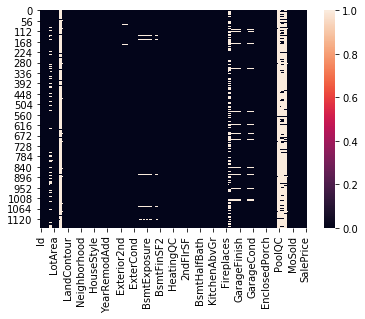

In [7]:
# checking null values using heatmap.
sns.heatmap(df.isnull())

Observation: We can see presence of null values very clearly with the help of heatmap in the dataset.

In [8]:
#checking datatypes of the dataframe
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Observation: We can see that there are many columns present in the dataset which are not nuemerical but categorical in nature.

In [9]:
# Dropping columns having more than 50% of null values in the dataset.
dataset = [train_data, test_data]
for dt in dataset:
    dt.drop(['Alley'], axis=1, inplace=True)
    dt.drop(['FireplaceQu'], axis=1, inplace=True)
    dt.drop(['PoolQC'], axis=1, inplace=True)
    dt.drop(['Fence'], axis=1, inplace=True)
    dt.drop(['MiscFeature'], axis=1, inplace=True)

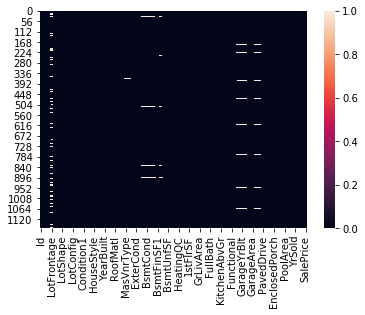

In [10]:
# checking null values using heatmap.
sns.heatmap(train_data.isnull())

Observation: We can see that still there are presence of null values in the dataset, which we need to take care according to the column.

# UNIVARIATE ANALYSIS:

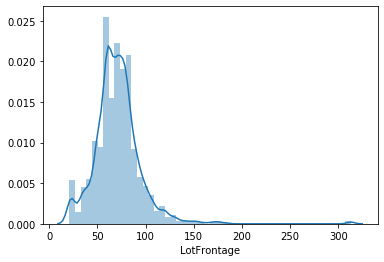

In [11]:
sns.distplot(train_data['LotFrontage'])

Obsetvation: Distplot of 'LotFrontage' column is Right sided skewed.

In [12]:
# replacing null values of 'LotFrontage' column by mean values of the column.
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(), inplace=True)

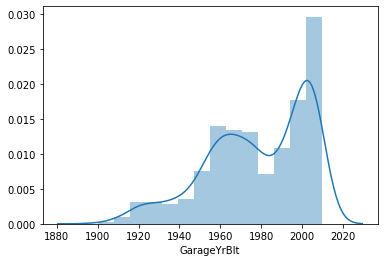

In [13]:
sns.distplot(train_data['GarageYrBlt'])

In [14]:
train_data['GarageYrBlt'].median()

1980.0

In [15]:
#replacing null values of 'GarageYrBlt' column by median values of the column.
train_data['GarageYrBlt'].fillna(1980, inplace=True)

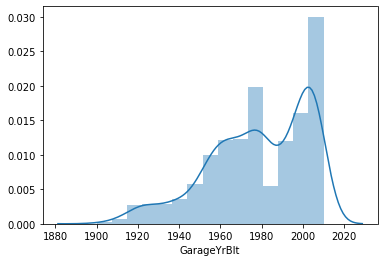

In [16]:
#checking distplot after replacing null values:
sns.distplot(train_data['GarageYrBlt'])

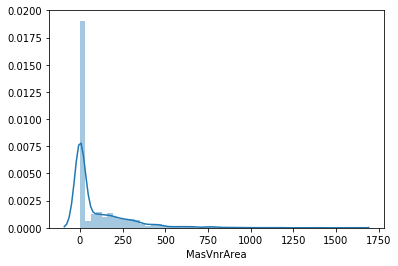

In [17]:
sns.distplot(train_data['MasVnrArea'])

In [18]:
train_data['MasVnrArea'].mean()

102.31007751937985

In [19]:
# replacing null values of 'MasVnrArea' column by mean values of the column.
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean(), inplace=True)

In [20]:
train_data['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [43]:
# replacing null values of 'MasVnrType' column by mode values of the column.
train_data['MasVnrType'].fillna('None', inplace=True)

In [21]:
train_data['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [22]:
# replacing null values of 'BsmtQual' column by mode values of the column.
train_data['BsmtQual'].fillna('TA', inplace=True)

In [23]:
train_data['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [24]:
# replacing null values of 'BsmtCond' column by mode values of the column.
train_data['BsmtCond'].fillna('TA', inplace=True)

In [25]:
train_data['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [26]:
# replacing null values of 'BsmtExposure' column by mode values of the column.
train_data['BsmtExposure'].fillna('No', inplace=True)

In [27]:
train_data['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [28]:
# replacing null values of 'BsmtFinType1' column by mode values of the column.
train_data['BsmtFinType1'].fillna('Unf', inplace=True)

In [29]:
train_data['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [30]:
# replacing null values of 'BsmtFinType2' column by mode values of the column.
train_data['BsmtFinType2'].fillna('Unf', inplace=True)

In [31]:
train_data['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [32]:
# replacing null values of 'GarageType' column by mode values of the column.
train_data['GarageType'].fillna('Attchd', inplace=True)

In [33]:
train_data['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [34]:
# replacing null values of 'GarageFinish' column by mode values of the column.
train_data['GarageFinish'].fillna('Unf', inplace=True)

In [35]:
train_data['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64

In [36]:
# replacing null values of 'GarageQual' column by mode values of the column.
train_data['GarageQual'].fillna('TA', inplace=True)

In [37]:
train_data['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [38]:
# replacing null values of 'GarageCond' column by mode values of the column.
train_data['GarageCond'].fillna('TA', inplace=True)

In [44]:
#checking null values:
pd.set_option('display.max_rows', None)
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

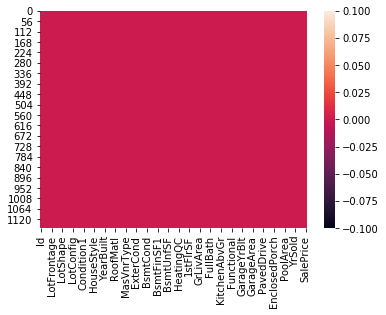

In [45]:
sns.heatmap(train_data.isnull())

Observation: We can now ensure that there are no Null Values in the dataset.

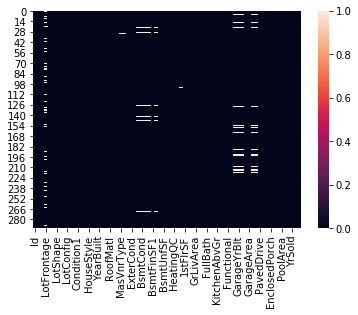

In [46]:
# checking null values of test data using heatmap.
sns.heatmap(test_data.isnull())

In [47]:
pd.set_option('display.max_rows', None)
test_data.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        1
MasVnrArea        1
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          7
BsmtCond          7
BsmtExposure      7
BsmtFinType1      7
BsmtFinSF1        0
BsmtFinType2      7
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


Observation: We can see there are presence of null values in the columns like LotFrontage,MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond. 

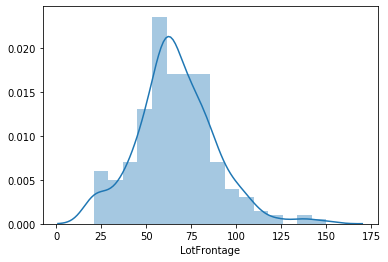

In [48]:
sns.distplot(test_data['LotFrontage'])

In [49]:
#replacing null values of 'LotFrontage' column by mean values of the column.
test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean(), inplace=True)

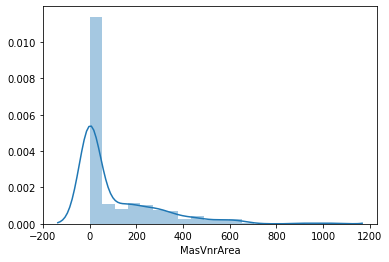

In [50]:
sns.distplot(test_data['MasVnrArea'])

In [51]:
#replacing null values of 'MasVnrArea' column by mean values of the column.
test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean(), inplace=True)

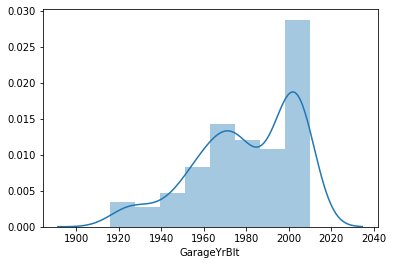

In [52]:
sns.distplot(test_data['GarageYrBlt'])

In [53]:
#replacing null values of 'GarageYrBlt' column by mean values of the column.
test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean(), inplace=True)

In [54]:
test_data['MasVnrType'].value_counts()

None       168
BrkFace     91
Stone       30
BrkCmn       2
Name: MasVnrType, dtype: int64

In [55]:
#replacing null values of 'MasVnrType' column by mode values of the column.
test_data['MasVnrType'].fillna('None', inplace=True)

In [56]:
test_data['BsmtQual'].value_counts()

TA    132
Gd    120
Ex     27
Fa      6
Name: BsmtQual, dtype: int64

In [57]:
#replacing null values of 'BsmtQual' column by mode values of the column.
test_data['BsmtQual'].fillna('TA', inplace=True)

In [58]:
test_data['BsmtCond'].value_counts()

TA    270
Gd      9
Fa      6
Name: BsmtCond, dtype: int64

In [59]:
#replacing null values of 'BsmtCond' column by mode values of the column.
test_data['BsmtCond'].fillna('TA', inplace=True)

In [60]:
test_data['BsmtExposure'].value_counts()

No    197
Av     41
Gd     26
Mn     21
Name: BsmtExposure, dtype: int64

In [61]:
#replacing null values of 'BsmtExposure' column by mode values of the column.
test_data['BsmtExposure'].fillna('No', inplace=True)

In [62]:
test_data['BsmtFinType1'].value_counts()

GLQ    88
Unf    85
ALQ    46
BLQ    27
Rec    24
LwQ    15
Name: BsmtFinType1, dtype: int64

In [63]:
#replacing null values of 'BsmtFinType1' column by mode values of the column.
test_data['BsmtFinType1'].fillna('GLQ', inplace=True)

In [64]:
test_data['BsmtFinType2'].value_counts()

Unf    254
Rec     11
BLQ      9
LwQ      6
ALQ      3
GLQ      2
Name: BsmtFinType2, dtype: int64

In [65]:
#replacing null values of 'BsmtFinType2' column by mode values of the column.
test_data['BsmtFinType2'].fillna('Unf', inplace=True)

In [66]:
test_data['Electrical'].value_counts()

SBrkr    264
FuseA     20
FuseF      6
FuseP      1
Name: Electrical, dtype: int64

In [67]:
#replacing null values of 'Electrical' column by mode values of the column.
test_data['Electrical'].fillna('SBrkr', inplace=True)

In [68]:
test_data['GarageType'].value_counts()

Attchd     179
Detchd      73
BuiltIn     18
Basment      3
CarPort      1
2Types       1
Name: GarageType, dtype: int64

In [69]:
#replacing null values of 'GarageType' column by mode values of the column.
test_data['GarageType'].fillna('Attchd', inplace=True)

In [70]:
test_data['GarageFinish'].value_counts()

Unf    118
RFn     83
Fin     74
Name: GarageFinish, dtype: int64

In [71]:
#replacing null values of 'GarageFinish' column by mode values of the column.
test_data['GarageFinish'].fillna('Unf', inplace=True)

In [72]:
test_data['GarageQual'].value_counts()

TA    261
Fa      9
Gd      3
Po      1
Ex      1
Name: GarageQual, dtype: int64

In [73]:
#replacing null values of 'GarageQual' column by mode values of the column.
test_data['GarageQual'].fillna('TA', inplace=True)

In [74]:
test_data['GarageCond'].value_counts()

TA    265
Fa      7
Gd      1
Po      1
Ex      1
Name: GarageCond, dtype: int64

In [75]:
#replacing null values of 'GarageCond' column by mode values of the column.
test_data['GarageCond'].fillna('TA', inplace=True)

In [76]:
#dropping 'id' column.
test_data.drop(['Id'], axis=1, inplace=True)

In [77]:
#dropping 'id' column.
train_data.drop(['Id'], axis=1, inplace=True)

In [80]:
#creating new dataframe to check box plot of the true numeric columns:
df_int = train_data[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

# CHECKING OUTLIERS AND SKEWNESS:

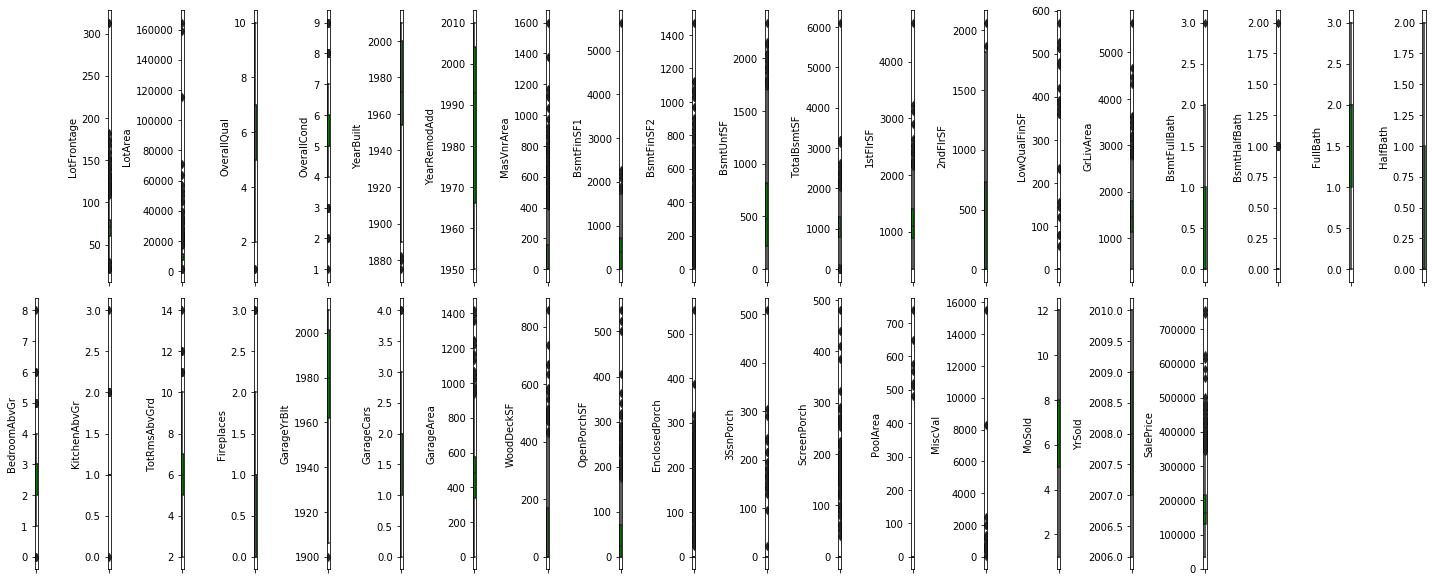

In [81]:
collist = df_int.columns.values
ncol=20
nrows=25

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df_int[collist[i]],color='green',orient='v')
    plt.tight_layout()

Observation: We can see there are presence of outliers in almost all columns.

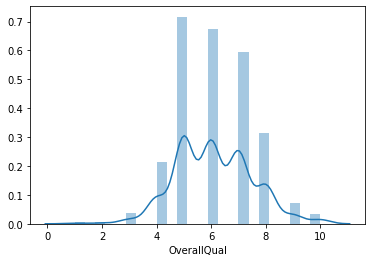

In [82]:
# distplot 1>>>
sns.distplot(df['OverallQual'])

Observation: This column 'OverallQual' is left hand sided skewed.

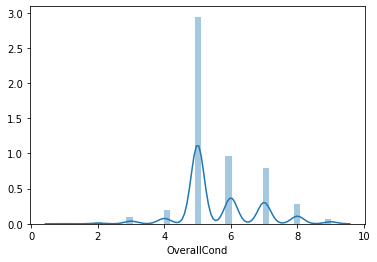

In [83]:
# distplot 2>>>
sns.distplot(df['OverallCond'])

Observation: This column 'OverallCond' is left hand sided skewed.

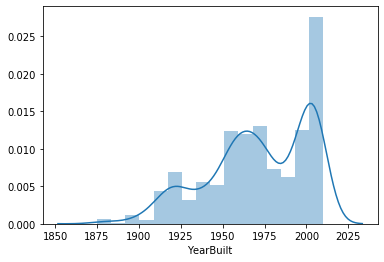

In [84]:
# distplot 3>>>
sns.distplot(df['YearBuilt'])

Observation: This column 'YearBuilt' is left hand sided skewed.

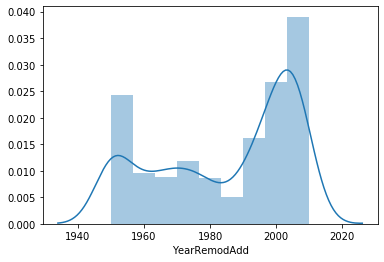

In [85]:
# distplot 4>>>
sns.distplot(df['YearRemodAdd'])

Observation: No Skewness observed in the YearRemodAdd column.

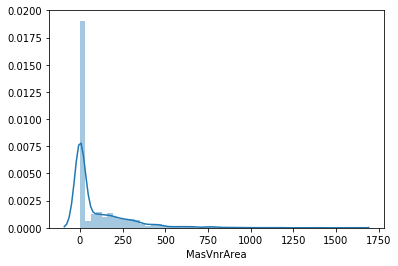

In [86]:
# distplot 5>>>
sns.distplot(df['MasVnrArea'])

Observation: This column 'MasVnrArea' is Right hand sided skewed.

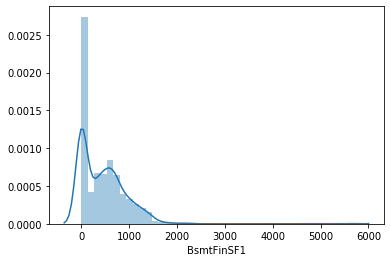

In [87]:
# distplot 6>>>
sns.distplot(df['BsmtFinSF1'])

Observation: This column 'BsmtFinSF1' is Right hand sided skewed.

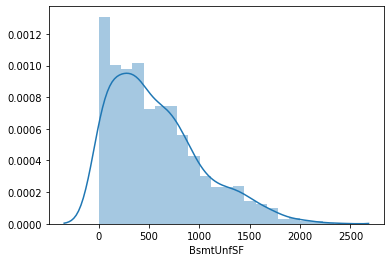

In [88]:
# distplot 7>>>
sns.distplot(df['BsmtUnfSF'])

Observation: This column 'BsmtUnfSF' is Right hand sided skewed.

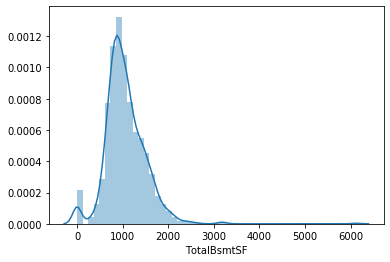

In [89]:
# distplot 8>>>
sns.distplot(df['TotalBsmtSF'])

Observation: This column 'TotalBsmtSF' is Right hand sided skewed.

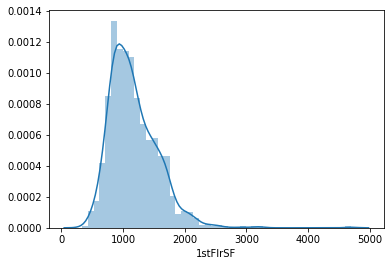

In [90]:
# distplot 9>>>
sns.distplot(df['1stFlrSF'])

Observation: This column '1stFlrSF' is Right hand sided skewed.

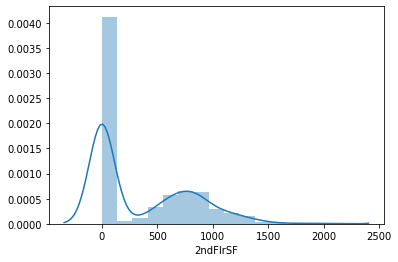

In [91]:
# distplot 10>>>
sns.distplot(df['2ndFlrSF'])

Observation: This column '2ndFlrSF' is Right hand sided skewed.

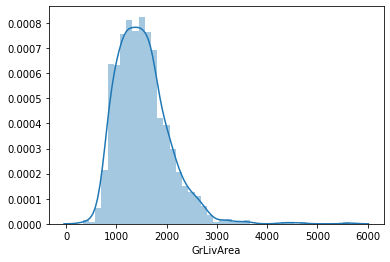

In [92]:
# distplot 11>>>
sns.distplot(df['GrLivArea'])

Observation: This column 'GrLivArea' is Right hand sided skewed.

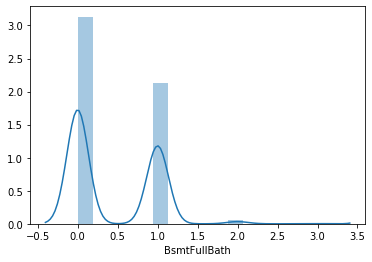

In [94]:
# distplot 12>>>
sns.distplot(df['BsmtFullBath'])

Observation: This column 'BsmtFullBath' is Right hand sided skewed.

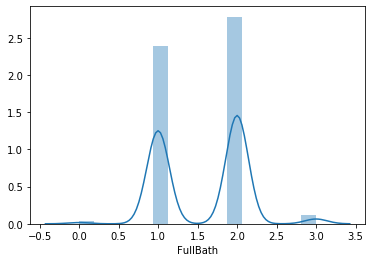

In [95]:
# distplot 13>>>
sns.distplot(df['FullBath'])

Observation: This column 'FullBath' is both Left & Right hand sided skewed.

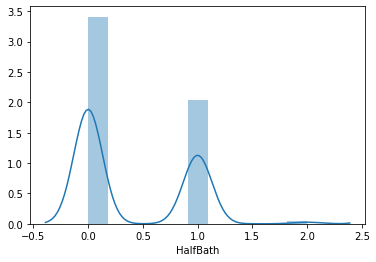

In [96]:
# distplot 14>>>
sns.distplot(df['HalfBath'])

Observation: This column 'HalfBath' is Right hand sided skewed.

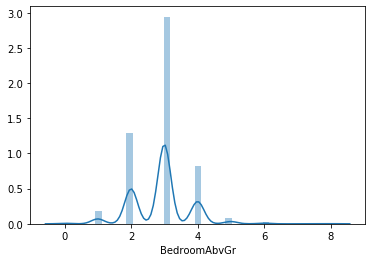

In [97]:
# distplot 15>>>
sns.distplot(df['BedroomAbvGr'])

Observation: This column 'BedroomAbvGr' is both Left & Right hand sided skewed.

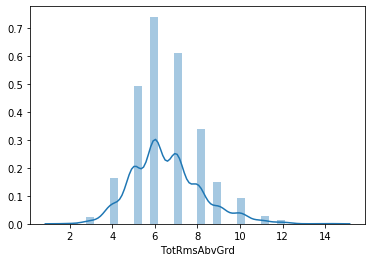

In [98]:
# distplot 16>>>
sns.distplot(df['TotRmsAbvGrd'])

Observation: This column 'TotRmsAbvGrd' is both Left & Right hand sided skewed.

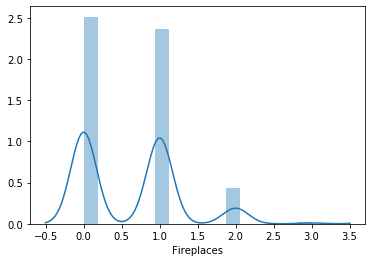

In [99]:
# distplot 17>>>
sns.distplot(df['Fireplaces'])

Observation: This column 'Fireplaces' is Right hand sided skewed.

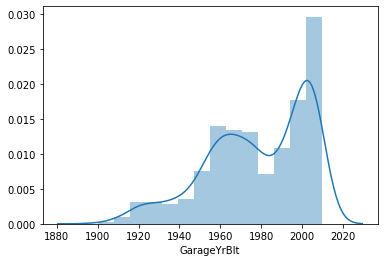

In [100]:
# distplot 18>>>
sns.distplot(df['GarageYrBlt'])

Observation: No Skewness observed in the column 'GarageYrBlt'.

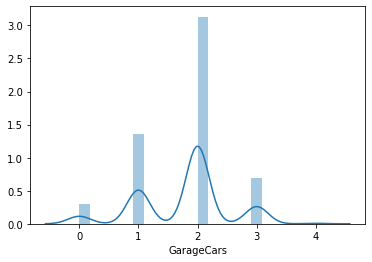

In [101]:
# distplot 19>>>
sns.distplot(df['GarageCars'])

Observation: No Skewness observed in the column 'GarageCars'.

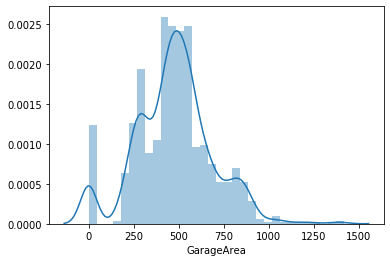

In [102]:
# distplot 20>>>
sns.distplot(df['GarageArea'])

Observation: This column 'GarageArea' is Right hand sided skewed.

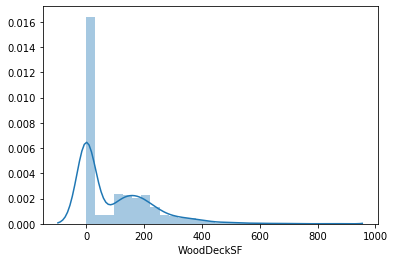

In [103]:
# distplot 21>>>
sns.distplot(df['WoodDeckSF'])

Observation: This column 'WoodDeckSF' is Right hand sided skewed.

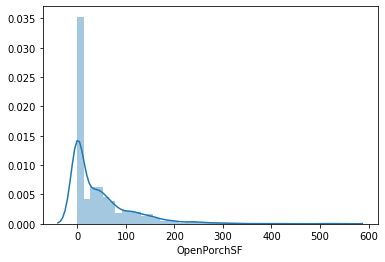

In [104]:
# distplot 22>>>
sns.distplot(df['OpenPorchSF'])

Observation: This column 'OpenPorchSF' is Right hand sided skewed.

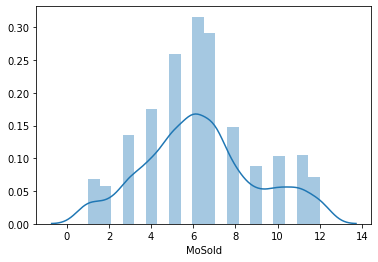

In [105]:
# distplot 23>>>
sns.distplot(df['MoSold'])

Observation: No Skewness observed in the 'MoSold' column.

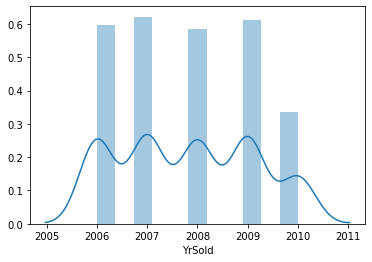

In [106]:
# distplot 24>>>
sns.distplot(df['YrSold'])

Observation: No Skewness observed in the 'YrSold' column.

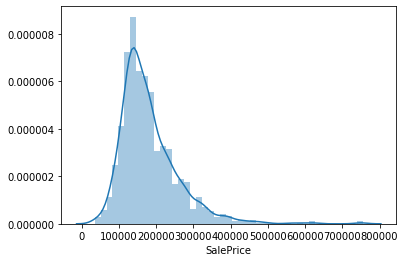

In [107]:
# distplot 25>>>
sns.distplot(df['SalePrice'])

Observation: This column 'SalePrice' is Right hand sided skewed.

In [117]:
#checking skewness:
train_data.skew()

MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.674913
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

Observation: We can see that skewness present in almost all the columns.

# BIVARIATE ANALYSIS:

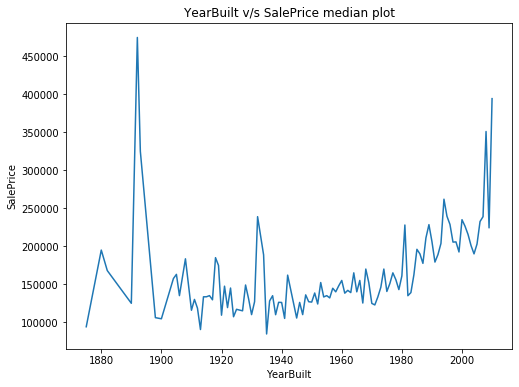

In [109]:
plt.figure(figsize=(8,6))
df.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title("YearBuilt v/s SalePrice median plot")
plt.show()

Observation: We can see that from the above median plot, most of sale price ranges from 100000 to 150000 of all yearbuilt range. We can also see that from 1885 to 1990 yearbuilit range, we see huge sale price growth. we can see also see sudden growth in sales price from 1980 to 2000 and above years.

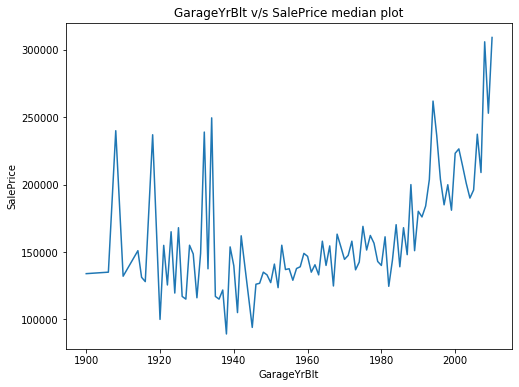

In [110]:
plt.figure(figsize=(8,6))
df.groupby('GarageYrBlt')['SalePrice'].median().plot()
plt.xlabel('GarageYrBlt')
plt.ylabel('SalePrice')
plt.title("GarageYrBlt v/s SalePrice median plot")
plt.show()

Observation: We can see that from the above median plot, most of sale price ranges from 100000 to 250000 of all GarageYrBuilt range. We can see also see sudden growth in sales price from 1980 to 2000 and above years.

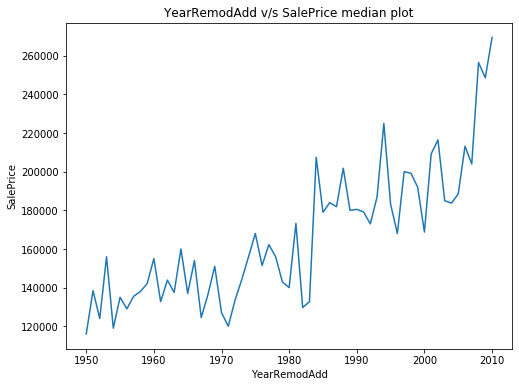

In [111]:
plt.figure(figsize=(8,6))
df.groupby('YearRemodAdd')['SalePrice'].median().plot()
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.title("YearRemodAdd v/s SalePrice median plot")
plt.show()

Observation: We see slow and steady growth in salesprice as years range from 1950 to 2010.  1950 YearRemodAdd has least SalePrice and 2010 YearRemodAdd has maximum sale price.

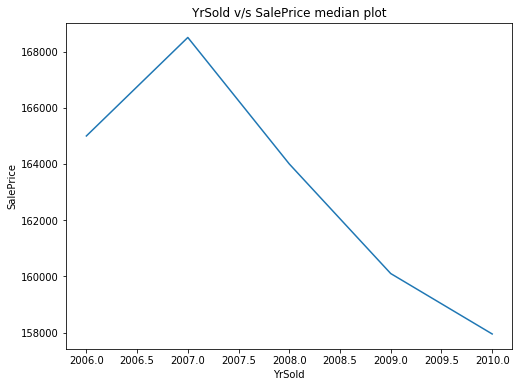

In [112]:
plt.figure(figsize=(8,6))
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.title("YrSold v/s SalePrice median plot")
plt.show()

Observation: 2007 yearsold property is having maximum sale price of more than 168000. and curve is deceasing as we go from 2007 to 2010 years range.

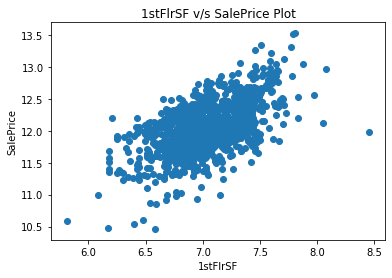

In [113]:
#Scatter Plot - 1.
df['1stFlrSF']=np.log(df['1stFlrSF'])
df['SalePrice']=np.log(df['SalePrice'])
plt.scatter(df['1stFlrSF'],df['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title('1stFlrSF v/s SalePrice Plot')
plt.show()

Observation: Most of the Sales Price values range from 11.0 to 13.0 and Most of the 1stFlrSF values range from 6.2 to 7.8. Most of the dataset are linearly spreaded.

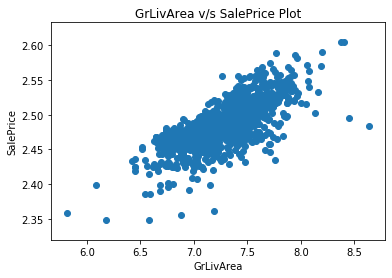

In [114]:
#Scatter Plot - 2.
df['GrLivArea']=np.log(df['GrLivArea'])
df['SalePrice']=np.log(df['SalePrice'])
plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea v/s SalePrice Plot')
plt.show()

Observation: Most of the Sales Price values range from 2.40 to 2.58 and Most of the GrLivArea values range from 6.5 to 8. Most of the dataset are linearly correlated.

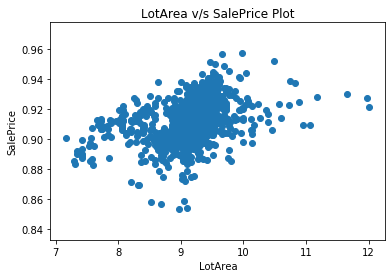

In [115]:
#Scatter Plot - 3.
df['LotArea']=np.log(df['LotArea'])
df['SalePrice']=np.log(df['SalePrice'])
plt.scatter(df['LotArea'],df['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('LotArea v/s SalePrice Plot')
plt.show()

Observation: Most of the Sales Price values range from 0.87 to 0.95 and Most of the LotArea values range from 7.5 to 10.5 Most of the dataset are widespreaded.

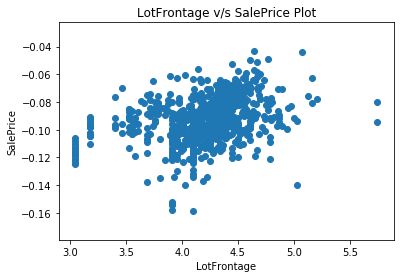

In [116]:
#Scatter Plot - 4.
df['LotFrontage']=np.log(df['LotFrontage'])
df['SalePrice']=np.log(df['SalePrice'])
plt.scatter(df['LotFrontage'],df['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('LotFrontage v/s SalePrice Plot')
plt.show()

Observation: Most of the Sales Price values range from -0.13 to -0.06 and Most of the LotFrontage values range from 3.5 to 5. Most of the dataset are widespreaded across.

# LABEL ENCODING THE CATEGORICAL COLUMNS:

In [118]:
# labelencoding the categorical columns
dataset = [train_data, test_data]
for dt in dataset:
    LE = LabelEncoder()
    dt['MSZoning'] = LE.fit_transform(dt['MSZoning'])
    dt['Street'] = LE.fit_transform(dt['Street'])
    dt['LotShape'] = LE.fit_transform(dt['LotShape'])
    dt['LandContour'] = LE.fit_transform(dt['LandContour'])
    dt['Utilities'] = LE.fit_transform(dt['Utilities'])
    dt['LotConfig'] = LE.fit_transform(dt['LotConfig'])
    dt['LandSlope'] = LE.fit_transform(dt['LandSlope'])
    dt['Neighborhood'] = LE.fit_transform(dt['Neighborhood'])
    dt['Condition1'] = LE.fit_transform(dt['Condition1'])
    dt['Condition2'] = LE.fit_transform(dt['Condition2'])
    dt['BldgType'] = LE.fit_transform(dt['BldgType'])
    dt['HouseStyle'] = LE.fit_transform(dt['HouseStyle'])
    dt['RoofStyle'] = LE.fit_transform(dt['RoofStyle'])
    dt['RoofMatl'] = LE.fit_transform(dt['RoofMatl'])
    dt['Exterior1st'] = LE.fit_transform(dt['Exterior1st'])
    dt['Exterior2nd'] = LE.fit_transform(dt['Exterior2nd'])
    dt['MasVnrType'] = LE.fit_transform(dt['MasVnrType'])
    dt['ExterQual'] = LE.fit_transform(dt['ExterQual'])
    dt['ExterCond'] = LE.fit_transform(dt['ExterCond'])
    dt['Foundation'] = LE.fit_transform(dt['Foundation'])
    dt['BsmtQual'] = LE.fit_transform(dt['BsmtQual'])
    dt['BsmtCond'] = LE.fit_transform(dt['BsmtCond'])
    dt['BsmtExposure'] = LE.fit_transform(dt['BsmtExposure'])
    dt['BsmtFinType1'] = LE.fit_transform(dt['BsmtFinType1'])
    dt['BsmtFinType2'] = LE.fit_transform(dt['BsmtFinType2'])
    dt['Heating'] = LE.fit_transform(dt['Heating'])
    dt['HeatingQC'] = LE.fit_transform(dt['HeatingQC'])
    dt['CentralAir'] = LE.fit_transform(dt['CentralAir'])
    dt['Electrical'] = LE.fit_transform(dt['Electrical'])
    dt['KitchenQual'] = LE.fit_transform(dt['KitchenQual'])
    dt['Functional'] = LE.fit_transform(dt['Functional'])
    dt['GarageType'] = LE.fit_transform(dt['GarageType'])
    dt['GarageFinish'] = LE.fit_transform(dt['GarageFinish'])
    dt['GarageQual'] = LE.fit_transform(dt['GarageQual'])
    dt['GarageCond'] = LE.fit_transform(dt['GarageCond'])
    dt['PavedDrive'] = LE.fit_transform(dt['PavedDrive'])
    dt['SaleType'] = LE.fit_transform(dt['SaleType'])
    dt['SaleCondition'] = LE.fit_transform(dt['SaleCondition'])

In [119]:
# checking datatypes again:
test_data.dtypes

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities          int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir         int32


Observation: We can now ensure that all columns are nuemerical in both train and test dataset.

# Checking Correlation matrix:

In [121]:
# checking correlation matrix:
dfcor = df.corr()
dfcor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004259,-0.023236,-0.025426,-0.036965,0.039761,-0.016942,-0.018590,-0.060652,0.003868,...,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.024168
MSSubClass,0.004259,1.000000,-0.498352,-0.434493,0.070462,-0.056978,0.023988,0.056618,0.027868,-0.052236,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.042270
LotFrontage,-0.023236,-0.498352,1.000000,0.748426,0.212193,-0.025372,0.083306,0.070549,0.158939,0.185030,...,0.117244,0.146096,0.029279,0.061543,0.049231,0.136580,0.012867,0.036388,-0.008669,0.351482
LotArea,-0.025426,-0.434493,0.748426,1.000000,0.167825,0.017039,0.006150,0.020099,0.120674,0.227745,...,0.216093,0.142938,0.023821,0.059133,0.071920,0.104138,0.057981,0.025986,-0.039069,0.377880
OverallQual,-0.036965,0.070462,0.212193,0.167825,1.000000,-0.083167,0.575800,0.555945,0.409163,0.219643,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.813418
OverallCond,0.039761,-0.056978,-0.025372,0.017039,-0.083167,1.000000,-0.377731,0.080669,-0.137882,-0.028810,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.007819
YearBuilt,-0.016942,0.023988,0.083306,0.006150,0.575800,-0.377731,1.000000,0.592829,0.323006,0.227933,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.576979
YearRemodAdd,-0.018590,0.056618,0.070549,0.020099,0.555945,0.080669,0.592829,1.000000,0.181869,0.114430,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.572150
MasVnrArea,-0.060652,0.027868,0.158939,0.120674,0.409163,-0.137882,0.323006,0.181869,1.000000,0.267066,...,0.151978,0.131850,-0.102321,0.018721,0.046509,0.013590,-0.027583,0.013432,-0.013493,0.407918
BsmtFinSF1,0.003868,-0.052236,0.185030,0.227745,0.219643,-0.028810,0.227933,0.114430,0.267066,1.000000,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.343955


# CHECKING HEATMAP OF CORRELATION MATRIX:

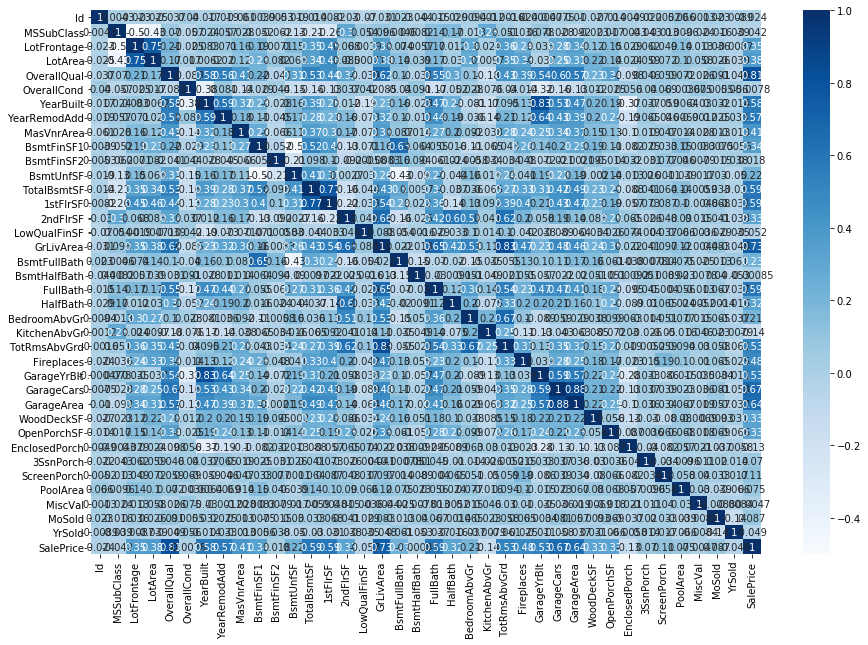

In [123]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,cmap='Blues', annot=True)

Observation: We can see that there are various columns which are highly correlated with the Sales price, like LotArea, OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, GrLivArea, GarageCars, GarageArea etc.

# REMOVING OUTLIERS:

In [126]:
# removing outliers with the help of zscore methods.
from scipy.stats import zscore
z=np.abs(zscore(train_data))
z

array([[1.50830058, 0.02164599, 0.        , ..., 0.33003329, 0.20793187,
        0.67631017],
       [0.87704243, 0.02164599, 1.07063136, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.07709478, 0.02164599, 0.93686671, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [2.46243779, 0.02164599, 2.09513215, ..., 0.33003329, 0.20793187,
        0.41705186],
       [0.31562908, 4.76211672, 0.93583847, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.07709478, 0.02164599, 0.        , ..., 0.33003329, 0.20793187,
        0.02179027]])

In [127]:
threshold = 3
print(np.where(z>threshold))

#creating new dataset without outliers and skewness
df_new = train_data[(z<3).all(axis=1)]
df_new

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 9, 20, 34, ..., 39, 61, 62], dtype=int64))


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [128]:
print(((train_data.shape[0]-df_new.shape[0])/train_data.shape[0]*100))

100.0


Observation: We can see that our dataset is full of outliers and we cannot remove them, if we try to remove outliers, we are lossing all dataset.

In [129]:
# creating x,y dataset for further model building.
x = train_data.iloc[:,0:74]
y = train_data.iloc[:,-1]

# SCALING THE DATASETS:

In [131]:
#Scaling the train dataset::
sc = StandardScaler()
x_scaled= sc.fit_transform(x)
columnslist = ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SaleType','SaleCondition']

X = pd.DataFrame(x_scaled, columns = columnslist)


In [132]:
#Scaling the test dataset::
sc = StandardScaler()
test_x_scaled= sc.fit_transform(test_data)
columnslist = ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SaleType','SaleCondition']

test_X = pd.DataFrame(test_x_scaled, columns = columnslist)


# CREATING TRAIN_TEST DATASET:

In [133]:
#creating train test dataset from the x and y part inoder to start model making.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(934, 74)
(934,)
(234, 74)
(234,)


# LINEAR REGRESSION MODEL:

In [134]:
# Linear Regression model making:
lm = LinearRegression()
lm.fit(x_train, y_train)

print('linearRegression Coeffient', lm.coef_)
print('linearRegression Intercept', lm.intercept_)
print('linearRegression score', lm.score(x_train, y_train))

# predicting x_test values
y_pred = lm.predict(x_test)
y_pred

linearRegression Coeffient [-4.04087545e+03 -1.41079221e+03 -3.26952511e+03  2.89592579e+03
  5.12252915e+02 -7.61276822e+02  2.58941181e+03 -7.60944722e+16
  1.09143682e+03 -2.90000000e+02  1.03200000e+03 -4.64000000e+02
  1.72000000e+02 -4.31200000e+03 -2.16600000e+03  1.59460000e+04
  3.05725000e+03  1.70475000e+03  1.23700000e+03  4.00000000e+02
  4.29800000e+03 -4.64800000e+03  2.17250000e+03  4.72100000e+03
  8.84200000e+03 -7.73062500e+03  9.10000000e+01  9.78000000e+02
 -8.71400000e+03  2.09100000e+03 -4.36600000e+03 -1.60600000e+03
  2.03543756e+16  1.18300000e+03  7.19386464e+15  1.97697307e+16
 -1.94572308e+16 -6.77000000e+02 -8.67000000e+02  1.30600000e+03
 -9.73000000e+02  1.19468014e+17  1.34291302e+17  1.55436041e+16
 -1.61273963e+17  5.80400000e+03  1.13200000e+03  2.18000000e+03
  2.12000000e+02 -1.70400000e+03 -2.46800000e+03 -6.76200000e+03
  1.31200000e+03  4.36300000e+03  1.93200000e+03 -1.22000000e+02
 -2.08400000e+03 -2.29950000e+03  1.09940000e+04 -4.40200000e+0

array([212372.20403121, 126385.60382122,  76583.67321238, 188230.36799017,
       110015.94077071, 336945.40003797, 166988.14423024, 169904.44217967,
       126612.52354637, 223464.04157728, 122171.47004598, 225949.04534585,
       222840.70193704, 223399.69626884, 142668.87318326, 275726.14221035,
       100846.80743799, 268901.09484346, 148261.42773747, 185810.51120589,
       162874.44038216, 328961.7373467 , 203886.12484633, 140295.89280496,
       174410.098488  , 116914.64835794, 139569.3837346 , 165185.4365607 ,
       290749.12980724, 180787.57217144, 177709.13148733, 190698.60912552,
       100893.48240026, 121899.14978602, 127649.76645684, 226983.89681172,
       166985.41304029, 133635.86991183, 103986.02344968, 210962.28671917,
        68556.47428018, 137534.59279886, 208775.79980496, 326559.27908367,
       101607.42308069,  85103.97537388, 148853.59349172, 129227.58074614,
       232288.36588793, 242868.03720365, 136769.20161116,  75068.08698194,
       142644.45035441, 1

Observation: Linear Regression method has accuracy score of 86.29%

In [135]:
# calculating errors::


print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  24022.45683066386
MEAN SQUARED ERROR:  2150878999.415809
ROOT MEAN SQUARED ERROR:  46377.57000335193


In [136]:
print('r2 Score of Linear Regression model: \n')
print(r2_score(y_test, y_pred))

r2 Score of Linear Regression model: 

0.6917192367083568


In [137]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(lm, X, y, cv=cv1).mean())

0.7220898441901451


# LASSO RIDGE METHOD:

Using Regularization methods like Lasso Ridge methods:

In [138]:
ls = Lasso(alpha = 0.01)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

0.8629446759725432

In [139]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(ls, X, y, cv=cv1).mean())

0.7430050966169042


In [140]:
rd = Ridge(alpha= 0.01)

rd.fit(x_train, y_train)
rd.score(x_train, y_train)

0.8629446758873841

In [141]:
print(cross_val_score(rd, X, y, cv=cv1).mean())

0.7679259522726531


Observation: Lasso Ridge Regularization method both has accuracy score of 86.29%

# ELASTICNET MODEL METHOD:

In [142]:
# elasticNet is a combination of both lasso and ridge algorithms

from sklearn.linear_model import ElasticNet
enr= ElasticNet(alpha= 0.01)

enr.fit(x_train, y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train, y_train))
enr.coef_

0.86292713062292


array([-4088.87149879, -1333.04047605, -3231.99865159,  2923.76100724,
         543.93359348,  -789.39868961,  2615.78269078,     0.        ,
        1122.17501531,  -248.99801473,  1072.19965094,  -418.43100014,
         206.38161037, -4199.1737084 , -2070.87233208, 15857.65206195,
        3030.73809164,  1606.45721507,  1287.71637874,   445.15166052,
        4346.42066247, -4559.72573425,  2082.29459099,  4674.5223678 ,
        8785.51900397, -7700.36637516,   118.58887484,  1062.28562884,
       -8686.6718696 ,  2017.1753279 , -4358.93466525, -1594.67558019,
         -20.4602855 ,  1163.59179639,   329.06086732,  -836.60501761,
        -750.51603677,  -694.49011652,  -861.46211339,  1285.14104654,
        -987.98069115, 11547.74670464,  7838.11341529,   741.44290544,
       15150.24739569,  5719.56851565,  1106.96358361,  2381.54876451,
         293.43950424, -1637.44104853, -2500.72601377, -6756.16384177,
        1587.45700493,  4315.44355039,  2120.75396854,  -123.93721338,
      

In [143]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, enrpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, enrpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, enrpred)))


ERRORS:
MEAN ABSOLUTE ERROR:  23910.36203251475
MEAN SQUARED ERROR:  2139220275.6950967
ROOT MEAN SQUARED ERROR:  46251.70565173891


In [144]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(enr, X, y, cv=cv1).mean())

0.7607397662455938


Observation: ElasticNet Regression method has accuracy score of 86.29%

# SUPPORT VECTOR REGRESSOR METHOD MODEL:

In [145]:
from sklearn.svm import SVR

kernellist = ['linear', 'poly', 'rbf']

for i in kernellist:
    sv = SVR(kernel = i)
    sv.fit(x_train, y_train)
    print('\nkernel : ' + i)
    print(sv.score(x_train, y_train))


kernel : linear
0.10138346916275853

kernel : poly
-0.04849659890614566

kernel : rbf
-0.04831978115031488


In [146]:
sv_lin = SVR('linear')
sv_lin.fit(x_train, y_train)
print(sv_lin.score(x_train, y_train))

0.10138346916275853


Observation: Support Vector Linear Regression method has accuracy score of 10%

In [147]:
sv_lin_pred_y = sv_lin.predict(x_test)

In [148]:
# checking errors:

print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, sv_lin_pred_y))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, sv_lin_pred_y))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, sv_lin_pred_y)))


ERRORS:
MEAN ABSOLUTE ERROR:  51617.76948360711
MEAN SQUARED ERROR:  6287866307.431715
ROOT MEAN SQUARED ERROR:  79296.0674146689


In [149]:
# checking r2 score error of support vector regressor linear model

print(r2_score(y_test, sv_lin_pred_y))

0.09877393137533852


In [150]:
cv1 = KFold(n_splits=10, shuffle=True)


print(cross_val_score(sv_lin, X, y, cv=cv1).mean())

0.1112372642637021


# DECISION TREE REGRESSOR MODEL:

In [151]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
preddtr = dtr.predict(x_test)

print(dtr.score(x_train, y_train))

1.0


Observation: Decision Tree Regression method has accuracy score of 100%

In [152]:
y_pred = dtr.predict(x_test)
y_pred

array([153500., 148000.,  97000., 178900.,  93000., 318000., 137500.,
       129500., 120000., 227875., 127000., 160000., 197000., 240000.,
       165000., 258000., 150500., 255500., 140000., 144000., 149500.,
       258000., 274300., 132500., 215000., 147000., 132250., 164700.,
       214000., 175000., 180000., 158000., 132500.,  84500., 144000.,
       215000., 162000., 115000., 120500., 201000.,  40000., 164900.,
       194000., 369900., 100000., 120000., 140000., 125000., 190000.,
       325000., 108480., 128000., 110000., 138000.,  75500., 380000.,
       187500., 138887., 163000., 209500., 255000., 170000., 122000.,
       108000., 256000., 115000., 213500., 234000., 120500., 100000.,
       119900., 255000., 403000., 339750., 174000., 107000., 200500.,
       426000., 129000., 100000., 136500., 157900., 238000., 239000.,
       110000., 125000., 154000.,  90000., 204000., 133000., 341000.,
       212900., 187750., 148000., 240000., 113000., 235000., 167000.,
       213000., 1040

In [153]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  30060.94017094017
MEAN SQUARED ERROR:  2636923818.863248
ROOT MEAN SQUARED ERROR:  51350.986542258834


In [154]:
from sklearn.model_selection import cross_val_score
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(dtr, X, y, cv=cv1).mean())

0.7614897394104376


# RANDOM FOREST REGRESSOR MODEL:

In [155]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(rf.score(x_train, y_train))

0.979362556726265


Observation: Random Forest Regression method has accuracy score of 97.93%

In [156]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  19627.468632478634
MEAN SQUARED ERROR:  1469426120.7861297
ROOT MEAN SQUARED ERROR:  38333.094328349354


In [157]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(rf, X, y, cv=cv1).mean())

0.8460132029449635


# ADA BOOST REGRESSOR METHOD:

In [158]:
adr = AdaBoostRegressor(n_estimators=100)
adr.fit(x_train, y_train)
pred=adr.predict(x_test)
print(adr.score(x_train, y_train))

0.88126353338128


Observation: Ada Boost Regression method has accuracy score of 88.12%

In [159]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  25910.75141344698
MEAN SQUARED ERROR:  1637974198.5510192
ROOT MEAN SQUARED ERROR:  40471.89393333378


In [160]:
from sklearn.model_selection import KFold

cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(adr, X, y, cv= cv1).mean())

0.7840667048023543


Observation: After checking all models accuracy score and cross validation score and also their errors, we found out that Ada Boost Regressor seems to be the best model, as it has good accuracy score and least error comparatively. The difference between the accuracy score and cross validation score is also minimal.

# HYPER PARAMETER TUNING MODEL:

In [161]:
# we can hyper tune our ada boost regressor to improve its accuracy:


from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : [50, 100, 150],
              'learning_rate': [1, 2],
              'loss' : ['linear', 'square', 'exponential'],
              'random_state' : [40, 42, 0]             
             }

In [162]:
gs_adr = GridSearchCV(AdaBoostRegressor(), parameters, cv = 5)

In [163]:
gs_adr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1, 2],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150],
                         'random_state': [40, 42, 0]})

In [164]:
# searching best parameters:

gs_adr.best_params_

{'learning_rate': 2,
 'loss': 'exponential',
 'n_estimators': 150,
 'random_state': 42}

Best Parameters after HyperParameter tuning:

learning_rate: 2,

loss: 'exponential',

n_estimators: 150,

random_state: 42

# FINAL MODEL MAKING:

In [165]:
adr_new = AdaBoostRegressor(learning_rate = 2, loss = 'exponential', n_estimators = 150, random_state = 42)
adr_new.fit(x_train, y_train)
adr_new_pred=adr_new.predict(x_test)
print(adr_new.score(x_train, y_train))

0.8843287130052065


In [166]:
from sklearn.model_selection import KFold

cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(adr_new, X, y, cv= cv1).mean())

0.7707765253516013


In [167]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, adr_new_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, adr_new_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, adr_new_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  26193.92793892159
MEAN SQUARED ERROR:  1668044542.2304046
ROOT MEAN SQUARED ERROR:  40841.70102028568


Observation:
After hyper tuning we can improve the accuracy of our model with point 0.31 % . so we can say that now our final model is the one having score of 88.43 %.



# Predicting the Test data file values using our best fit model.

In [168]:
adr_Final_Test_data_predicted=adr_new.predict(test_X)

In [169]:
adr_Final_Test_data_predicted

array([389581.8042328 , 233219.6375    , 264987.88842975, 177858.49295775,
       231716.91666667, 104368.86666667, 151877.22      , 338005.19230769,
       235864.25625   , 172659.56375839, 100982.65289256, 162962.14583333,
       122939.25842697, 217976.26315789, 333445.25698324, 136079.32124352,
       124040.56      , 117175.8358209 , 190731.18974359, 218969.75272727,
       172861.02673797, 174923.81553398, 143567.18378378, 100982.65289256,
       132953.168     , 134413.80571429, 171393.02325581, 144244.90494297,
       168261.51785714, 116255.33333333, 173405.60606061, 212100.35714286,
       242080.26470588, 179005.256     , 136640.90540541, 192370.7715736 ,
       190263.7340824 , 132159.54411765, 169863.5       , 165229.69512195,
       112259.58715596, 330560.57692308, 215314.10701107, 210603.13242009,
       144034.45774648, 151999.16901408, 118087.89677419, 133446.3271028 ,
       225892.98360656, 352645.77260982, 142671.08474576, 217363.15789474,
        97566.23300971, 1

# SAVING THE MODEL:

In [170]:
import joblib
joblib.dump(adr_new, 'Vaibhav_PFA_Housing_project_Model.pkl')

['Vaibhav_PFA_Housing_project_Model.pkl']

In [171]:
#Reloading the model and predicting the dataset.
PFA_adaboost_model = joblib.load('Vaibhav_PFA_Housing_project_Model.pkl')
PFA_adaboost_model.predict(x_train)

array([198151.69811321, 151393.2345679 , 330650.41666667, 209800.95620438,
       134413.80571429, 165229.69512195, 106419.61417323, 163938.93193717,
       198151.69811321, 404289.89430894, 285754.51282051, 132070.00900901,
       201803.98843931, 280562.79253112, 132070.00900901, 264987.88842975,
       352645.77260982, 172659.56375839, 353731.53097345, 189939.00763359,
       116255.33333333, 310497.87264151, 156323.75      , 146847.36842105,
       226335.00961538, 181246.59288538, 205309.92163009, 217363.15789474,
       224241.60309278, 181462.85263158, 189939.00763359, 132900.        ,
       177858.49295775, 172659.56375839, 215039.44761905, 174476.63473054,
       290686.11111111, 136079.32124352, 224339.7756654 , 210603.13242009,
       122474.94444444, 151999.16901408, 155314.13978495, 249687.83196721,
       103735.71428571, 217191.25688073, 328192.22962963, 166955.75757576,
       131608.29714286, 142671.08474576, 122939.25842697, 155681.18803419,
       222656.96296296, 2

# THANK YOU

Name: Vaibhav Tayade
contact details: 8087970061
Email Id: vaibhav_t29@rediffmail.com